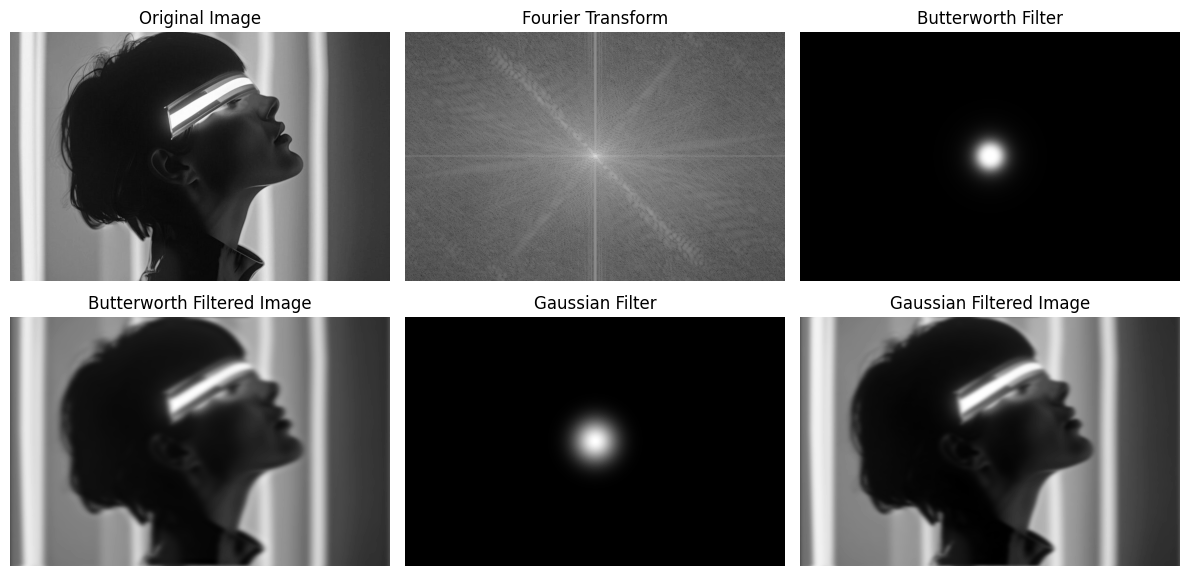

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
img = cv2.imread('DIP_assign_img.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Fourier Transform of the image
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)  # Shift the zero frequency to the center

# Magnitude Spectrum (for visualization)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))

# (b) Butterworth Filter
def butterworth_filter(shape, cutoff, order):
    P, Q = shape
    u, v = np.meshgrid(range(Q), range(P))
    u = u - ccol
    v = v - crow
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H

# Apply Butterworth filter
cutoff = 30  # Adjust cutoff frequency as needed
order = 2  # Order of the Butterworth filter
butterworth = butterworth_filter(img.shape, cutoff, order)
filtered_dft_butterworth = dft_shift * butterworth
butterworth_img = np.fft.ifft2(np.fft.ifftshift(filtered_dft_butterworth))
butterworth_img = np.abs(butterworth_img)

# (c) Gaussian Filter
def gaussian_filter(shape, cutoff):
    P, Q = shape
    u, v = np.meshgrid(range(Q), range(P))
    u = u - ccol
    v = v - crow
    D = np.sqrt(u**2 + v**2)
    H = np.exp(-(D**2) / (2 * (cutoff**2)))
    return H

# Apply Gaussian filter
cutoff = 30  # Adjust cutoff frequency as needed
gaussian = gaussian_filter(img.shape, cutoff)
filtered_dft_gaussian = dft_shift * gaussian
gaussian_img = np.fft.ifft2(np.fft.ifftshift(filtered_dft_gaussian))
gaussian_img = np.abs(gaussian_img)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(2, 3, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform'), plt.axis('off')

plt.subplot(2, 3, 3), plt.imshow(butterworth, cmap='gray')
plt.title('Butterworth Filter'), plt.axis('off')

plt.subplot(2, 3, 4), plt.imshow(butterworth_img, cmap='gray')
plt.title('Butterworth Filtered Image'), plt.axis('off')

plt.subplot(2, 3, 5), plt.imshow(gaussian, cmap='gray')
plt.title('Gaussian Filter'), plt.axis('off')

plt.subplot(2, 3, 6), plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian Filtered Image'), plt.axis('off')

plt.tight_layout()
plt.show()
